In [1]:
import numpy as np #para manejo de vectores
import matplotlib.pyplot as plt #para gráficas
import math # para operaciones matemáticas
import random #para números aleatorios

Valores iniciales:
Los vectores son de dimensión $dim = 10$

El dominio de cada coordenada es $[xmin,xmax] = [-10,10]$

La población inicial es de 100 individuos

Se generan vectores de manera aleatoria uniforme, considerando el artículo de Ono acerca de UNDX, el valor de la varianza para el eje principal es 
$$\sigma^2_\xi=\frac{1}{4}$$ 
y para el espacio ortogonal: 
$$\sigma^2_\eta=\frac{2}{3(n-1)} =  \frac{2}{27}$$ 

pues $n=dim =10$. 

Este es un algoritmo genético que sigue la propuesta de Ono: 
* Generar de manera aleatoria vectores de dimensión 10
* Elegir dos individuos de manera aleatoria sin reemplazo
* Generar decendencia aplicando UNDX a los individuos elegidos, se repite este proceso $n_c$ veces para crear $2\times n_c$ decendientes
* Sobreviven dos individuos de la familia que contiene a los padres y su decendencia; uno es el mejor individuo y el otro es elegido mediante ruleta. Los elementos reemplazan a los padres en la población
* Se repiten los pasos anteriores hasta algún criterio de paro



In [2]:
dim = 10
xmin = -10
xmax = 10

vareta = 0.074
varxi = 0.25

pobsize = 500
n_c = 250
pob_mut = 0.04
maxiter = 1500

In [3]:
########### Norma de un vector para ahorrar notación #################
def norma(v):
    return np.linalg.norm(v)

In [4]:
############ Generar vectores n dimensionales de manera aleatoria uniforme ##############
def create_pob(pobsize):
    pob = []
    for i in range(pobsize):
        vector = []
        for j in range(dim):
            x = random.uniform(-10,10)
            vector.append(x)            
        vector = np.array(vector)
        pob.append(vector)
    return pob           

In [5]:
########## Función fitness a optimizar, hallar mínimo en este caso ###########
def aptitud(x):
    return np.sum(x**2)

In [6]:
##############################################################
# Calcula el complemento ortogonal de un vector              #
# El resultado es una base de n-1 elementos de dimension n   #
##############################################################
def orthogonal_vectors(base_vector, num_vectors = dim -1):
    vectors = []
    while len(vectors) < num_vectors:
        vec = np.random.rand(dim)
        for v in vectors + [base_vector]:
            epsilon = 1e-8  #np batalla para dividir entre números pequeños
            vec -= np.dot(vec, v) / (np.dot(v, v) + epsilon) * v #sumo un número pequeño para evitar errores
        if norma(vec) > 1e-5:  
            vectors.append(vec / norma(vec))  
    return np.array(vectors)

In [7]:
##############################################
# Genera el elemento del espacio ortogonal   #
# usando la varianza teorica                 #
##############################################

def gen_corth(base):
    vect = 0
    for i in base:
        etai = np.random.normal(0,np.sqrt(vareta))
        vect += etai * i
    return vect

In [8]:
def mut_uniform(childs, prob_mut):
    for child in childs:
        for i in range(len(child)):
            if np.random.rand() < prob_mut:
                child[i] = np.random.uniform(xmin,xmax)
    return childs
          

In [9]:
###############################################################
# Segun ono sobrevive el mejor y el que gane                  #
# ruleta, la ruleta esta basada en la aptitud                 #
# como se intenta minimizar tomo el inverso multiplicativo    #
# para que la menor aptitud tenga mayor probabilidad          #
# de ser elegida                                              #
###############################################################
def survival_selection(family):
    best = min(family, key=lambda individual: aptitud(individual))
    weights = [1.0 / (aptitud(ind) + 1e-6) for ind in family]  
    roulette_selection = random.choices(family, weights=weights, k=1)[0]
    return best, roulette_selection


In [10]:
#################################################################
# Operador undx, recibe a la población y arroja a la población  #
# con el reemplazo hecho por la ruleta  y el mejor              #
#################################################################
def undx(pob, n_c,pob_mut):
    epsilon = 1e-8
    padres = random.sample(pob, 3)
    x1, x2, x3 = padres
    xp = 0.5 * (x2 + x1)
    d = x2 - x1
    offspring = []

    for _ in range(n_c):
        x31 = x3 - x1
        x21 = x2 - x1
        D = math.sqrt(norma(x31)**2 * (1 - (np.dot(x31, x21) / (norma(x31) * norma(x21) + epsilon))**2))
        orth_vects = orthogonal_vectors(d, num_vectors=dim-1)
        comp_orth = gen_corth(orth_vects)
        xi = np.random.normal(0, np.sqrt(varxi))
        x_c = xp + xi * d + comp_orth
        x_c2 = xp - xi * d - comp_orth
        offspring.extend([x_c, x_c2])
        
        
    offspring = mut_uniform(offspring,pob_mut)

    family = [x1, x2, x3] + offspring
    best, roulette = survival_selection(family)

    for idx in range(len(pob)):
        if np.array_equal(pob[idx], x1):
            pob[idx] = best
            break

    for idx in range(len(pob)):
        if np.array_equal(pob[idx], x2):
            pob[idx] = roulette
            break

    sorted_pob = sorted(pob, key=lambda individual: aptitud(individual))

    return sorted_pob

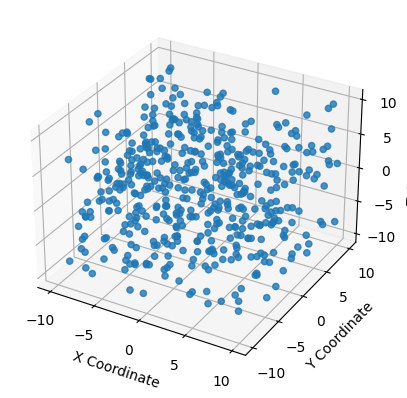

In [11]:
inpob = create_pob(pobsize)
x = np.array([arr[0] for arr in inpob])
y = np.array([arr[1] for arr in inpob])
z = np.array([arr[2] for arr in inpob])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


scatter = ax.scatter(x, y, z, alpha =0.8)

ax.set_xlabel('X Coordinate')
ax.set_ylabel('Y Coordinate')
ax.set_zlabel('Z Coordinate')

plt.show()

In [12]:
resultados= []
for i in range(maxiter):
    inpob = undx(inpob, n_c, pob_mut)
    print(f"generación {i+1} tiene como mejor aptitud {aptitud(inpob[0])}")
    resultados.append(aptitud(inpob[0]))

generación 1 tiene como mejor aptitud 75.05308064267066
generación 2 tiene como mejor aptitud 75.05308064267066
generación 3 tiene como mejor aptitud 75.05308064267066
generación 4 tiene como mejor aptitud 75.05308064267066
generación 5 tiene como mejor aptitud 75.05308064267066
generación 6 tiene como mejor aptitud 75.05308064267066
generación 7 tiene como mejor aptitud 75.05308064267066
generación 8 tiene como mejor aptitud 75.05308064267066
generación 9 tiene como mejor aptitud 75.05308064267066
generación 10 tiene como mejor aptitud 75.05308064267066
generación 11 tiene como mejor aptitud 75.05308064267066
generación 12 tiene como mejor aptitud 52.029680388355715
generación 13 tiene como mejor aptitud 52.029680388355715
generación 14 tiene como mejor aptitud 52.029680388355715
generación 15 tiene como mejor aptitud 52.029680388355715
generación 16 tiene como mejor aptitud 52.029680388355715
generación 17 tiene como mejor aptitud 52.029680388355715
generación 18 tiene como mejor apt

generación 143 tiene como mejor aptitud 8.649981619687688
generación 144 tiene como mejor aptitud 8.649981619687688
generación 145 tiene como mejor aptitud 8.649981619687688
generación 146 tiene como mejor aptitud 8.649981619687688
generación 147 tiene como mejor aptitud 8.649981619687688
generación 148 tiene como mejor aptitud 8.649981619687688
generación 149 tiene como mejor aptitud 8.649981619687688
generación 150 tiene como mejor aptitud 8.649981619687688
generación 151 tiene como mejor aptitud 8.649981619687688
generación 152 tiene como mejor aptitud 8.649981619687688
generación 153 tiene como mejor aptitud 8.649981619687688
generación 154 tiene como mejor aptitud 8.649981619687688
generación 155 tiene como mejor aptitud 8.649981619687688
generación 156 tiene como mejor aptitud 8.649981619687688
generación 157 tiene como mejor aptitud 8.649981619687688
generación 158 tiene como mejor aptitud 8.649981619687688
generación 159 tiene como mejor aptitud 8.649981619687688
generación 160

generación 284 tiene como mejor aptitud 3.7369988651082746
generación 285 tiene como mejor aptitud 3.7369988651082746
generación 286 tiene como mejor aptitud 3.7369988651082746
generación 287 tiene como mejor aptitud 3.7369988651082746
generación 288 tiene como mejor aptitud 3.7369988651082746
generación 289 tiene como mejor aptitud 3.7369988651082746
generación 290 tiene como mejor aptitud 3.7369988651082746
generación 291 tiene como mejor aptitud 3.7369988651082746
generación 292 tiene como mejor aptitud 3.7369988651082746
generación 293 tiene como mejor aptitud 3.7369988651082746
generación 294 tiene como mejor aptitud 3.7369988651082746
generación 295 tiene como mejor aptitud 3.7369988651082746
generación 296 tiene como mejor aptitud 3.7369988651082746
generación 297 tiene como mejor aptitud 3.7369988651082746
generación 298 tiene como mejor aptitud 3.7369988651082746
generación 299 tiene como mejor aptitud 3.7369988651082746
generación 300 tiene como mejor aptitud 3.73699886510827

generación 425 tiene como mejor aptitud 1.3414695471477367
generación 426 tiene como mejor aptitud 1.3414695471477367
generación 427 tiene como mejor aptitud 1.3414695471477367
generación 428 tiene como mejor aptitud 1.3414695471477367
generación 429 tiene como mejor aptitud 1.3414695471477367
generación 430 tiene como mejor aptitud 1.3414695471477367
generación 431 tiene como mejor aptitud 1.3414695471477367
generación 432 tiene como mejor aptitud 1.3414695471477367
generación 433 tiene como mejor aptitud 1.3414695471477367
generación 434 tiene como mejor aptitud 1.3414695471477367
generación 435 tiene como mejor aptitud 1.3414695471477367
generación 436 tiene como mejor aptitud 1.3414695471477367
generación 437 tiene como mejor aptitud 1.3414695471477367
generación 438 tiene como mejor aptitud 1.3414695471477367
generación 439 tiene como mejor aptitud 1.3414695471477367
generación 440 tiene como mejor aptitud 1.3414695471477367
generación 441 tiene como mejor aptitud 1.34146954714773

generación 565 tiene como mejor aptitud 0.4279873418357295
generación 566 tiene como mejor aptitud 0.4279873418357295
generación 567 tiene como mejor aptitud 0.4279873418357295
generación 568 tiene como mejor aptitud 0.4279873418357295
generación 569 tiene como mejor aptitud 0.4279873418357295
generación 570 tiene como mejor aptitud 0.4279873418357295
generación 571 tiene como mejor aptitud 0.4279873418357295
generación 572 tiene como mejor aptitud 0.4279873418357295
generación 573 tiene como mejor aptitud 0.4279873418357295
generación 574 tiene como mejor aptitud 0.4279873418357295
generación 575 tiene como mejor aptitud 0.4279873418357295
generación 576 tiene como mejor aptitud 0.4279873418357295
generación 577 tiene como mejor aptitud 0.4279873418357295
generación 578 tiene como mejor aptitud 0.4279873418357295
generación 579 tiene como mejor aptitud 0.4279873418357295
generación 580 tiene como mejor aptitud 0.4279873418357295
generación 581 tiene como mejor aptitud 0.42798734183572

generación 703 tiene como mejor aptitud 0.26985775406315804
generación 704 tiene como mejor aptitud 0.26985775406315804
generación 705 tiene como mejor aptitud 0.26985775406315804
generación 706 tiene como mejor aptitud 0.26985775406315804
generación 707 tiene como mejor aptitud 0.26985775406315804
generación 708 tiene como mejor aptitud 0.26985775406315804
generación 709 tiene como mejor aptitud 0.26985775406315804
generación 710 tiene como mejor aptitud 0.26985775406315804
generación 711 tiene como mejor aptitud 0.26985775406315804
generación 712 tiene como mejor aptitud 0.26985775406315804
generación 713 tiene como mejor aptitud 0.25592663311310226
generación 714 tiene como mejor aptitud 0.25592663311310226
generación 715 tiene como mejor aptitud 0.25592663311310226
generación 716 tiene como mejor aptitud 0.25592663311310226
generación 717 tiene como mejor aptitud 0.25592663311310226
generación 718 tiene como mejor aptitud 0.25592663311310226
generación 719 tiene como mejor aptitud 

generación 840 tiene como mejor aptitud 0.20823537000549422
generación 841 tiene como mejor aptitud 0.20823537000549422
generación 842 tiene como mejor aptitud 0.20823537000549422
generación 843 tiene como mejor aptitud 0.20823537000549422
generación 844 tiene como mejor aptitud 0.20823537000549422
generación 845 tiene como mejor aptitud 0.20823537000549422
generación 846 tiene como mejor aptitud 0.20823537000549422
generación 847 tiene como mejor aptitud 0.20823537000549422
generación 848 tiene como mejor aptitud 0.20823537000549422
generación 849 tiene como mejor aptitud 0.20823537000549422
generación 850 tiene como mejor aptitud 0.20823537000549422
generación 851 tiene como mejor aptitud 0.20823537000549422
generación 852 tiene como mejor aptitud 0.20823537000549422
generación 853 tiene como mejor aptitud 0.20823537000549422
generación 854 tiene como mejor aptitud 0.20823537000549422
generación 855 tiene como mejor aptitud 0.20823537000549422
generación 856 tiene como mejor aptitud 

generación 979 tiene como mejor aptitud 0.1290770135337547
generación 980 tiene como mejor aptitud 0.1290770135337547
generación 981 tiene como mejor aptitud 0.1290770135337547
generación 982 tiene como mejor aptitud 0.1290770135337547
generación 983 tiene como mejor aptitud 0.1290770135337547
generación 984 tiene como mejor aptitud 0.1290770135337547
generación 985 tiene como mejor aptitud 0.1290770135337547
generación 986 tiene como mejor aptitud 0.1290770135337547
generación 987 tiene como mejor aptitud 0.1290770135337547
generación 988 tiene como mejor aptitud 0.1290770135337547
generación 989 tiene como mejor aptitud 0.1290770135337547
generación 990 tiene como mejor aptitud 0.1290770135337547
generación 991 tiene como mejor aptitud 0.1290770135337547
generación 992 tiene como mejor aptitud 0.1290770135337547
generación 993 tiene como mejor aptitud 0.1290770135337547
generación 994 tiene como mejor aptitud 0.1290770135337547
generación 995 tiene como mejor aptitud 0.12907701353375

generación 1115 tiene como mejor aptitud 0.06942965068022404
generación 1116 tiene como mejor aptitud 0.06942965068022404
generación 1117 tiene como mejor aptitud 0.06942965068022404
generación 1118 tiene como mejor aptitud 0.06942965068022404
generación 1119 tiene como mejor aptitud 0.06942965068022404
generación 1120 tiene como mejor aptitud 0.06942965068022404
generación 1121 tiene como mejor aptitud 0.06942965068022404
generación 1122 tiene como mejor aptitud 0.06942965068022404
generación 1123 tiene como mejor aptitud 0.06942965068022404
generación 1124 tiene como mejor aptitud 0.06942965068022404
generación 1125 tiene como mejor aptitud 0.06942965068022404
generación 1126 tiene como mejor aptitud 0.06942965068022404
generación 1127 tiene como mejor aptitud 0.06942965068022404
generación 1128 tiene como mejor aptitud 0.06942965068022404
generación 1129 tiene como mejor aptitud 0.06942965068022404
generación 1130 tiene como mejor aptitud 0.06942965068022404
generación 1131 tiene co

generación 1250 tiene como mejor aptitud 0.06942965068022404
generación 1251 tiene como mejor aptitud 0.06942965068022404
generación 1252 tiene como mejor aptitud 0.06942965068022404
generación 1253 tiene como mejor aptitud 0.06942965068022404
generación 1254 tiene como mejor aptitud 0.06942965068022404
generación 1255 tiene como mejor aptitud 0.06942965068022404
generación 1256 tiene como mejor aptitud 0.06942965068022404
generación 1257 tiene como mejor aptitud 0.06942965068022404
generación 1258 tiene como mejor aptitud 0.06942965068022404
generación 1259 tiene como mejor aptitud 0.06942965068022404
generación 1260 tiene como mejor aptitud 0.06942965068022404
generación 1261 tiene como mejor aptitud 0.06942965068022404
generación 1262 tiene como mejor aptitud 0.06942965068022404
generación 1263 tiene como mejor aptitud 0.06942965068022404
generación 1264 tiene como mejor aptitud 0.06942965068022404
generación 1265 tiene como mejor aptitud 0.06942965068022404
generación 1266 tiene co

generación 1385 tiene como mejor aptitud 0.05407390974275187
generación 1386 tiene como mejor aptitud 0.05407390974275187
generación 1387 tiene como mejor aptitud 0.05407390974275187
generación 1388 tiene como mejor aptitud 0.05407390974275187
generación 1389 tiene como mejor aptitud 0.05407390974275187
generación 1390 tiene como mejor aptitud 0.05407390974275187
generación 1391 tiene como mejor aptitud 0.05407390974275187
generación 1392 tiene como mejor aptitud 0.05407390974275187
generación 1393 tiene como mejor aptitud 0.05407390974275187
generación 1394 tiene como mejor aptitud 0.05407390974275187
generación 1395 tiene como mejor aptitud 0.05407390974275187
generación 1396 tiene como mejor aptitud 0.05407390974275187
generación 1397 tiene como mejor aptitud 0.05407390974275187
generación 1398 tiene como mejor aptitud 0.05407390974275187
generación 1399 tiene como mejor aptitud 0.05407390974275187
generación 1400 tiene como mejor aptitud 0.05407390974275187
generación 1401 tiene co

In [13]:
print(aptitud(inpob[0]))

0.05407390974275187


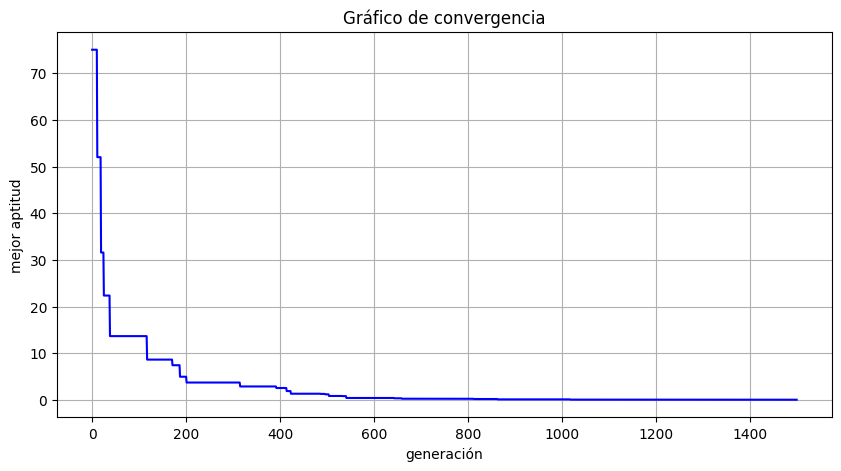

In [14]:
plt.figure(figsize=(10, 5))  # Crea una figura con un tamaño específico
plt.plot(resultados,  linestyle='-', color='b')
plt.title('Gráfico de convergencia')  
plt.xlabel('generación')  
plt.ylabel('mejor aptitud')  
plt.grid(True)

plt.show()

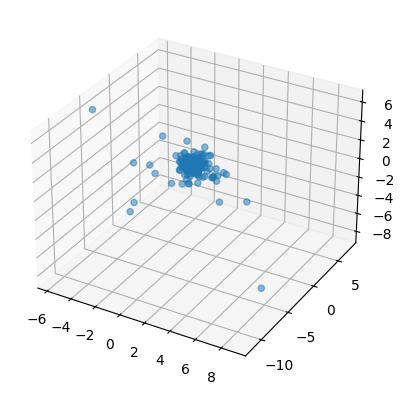

In [17]:
x = np.array([arr[0] for arr in inpob])
y = np.array([arr[1] for arr in inpob])
z = np.array([arr[2] for arr in inpob])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


scatter = ax.scatter(x, y, z, alpha = 0.5)
plt.show()

In [3]:
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D


def funcion(x, y):
    return x**2 + y**2


x = np.linspace(-10, 10, 400)
y = np.linspace(-10, 10, 400)
X, Y = np.meshgrid(x, y)
Z = funcion(X, Y)


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')


ax.set_xlim([-10, 10])
ax.set_ylim([-10, 10])
ax.set_zlim([np.min(Z), np.max(Z)])


ax.set_box_aspect([1,1,1])  


plt.show()


In [2]:
9